In [14]:
! pip install jupyter plotnine pandas mizani

# https://medium.com/@pablosjv/importing-local-python-modules-into-jupyter-notebooks-87336b2d7746
%load_ext autoreload
%autoreload 2


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd

from data import csv_data_add_histogram, csv_data_search_histogram

#csv_data

# Calculate additional columns:
# csv_data_add_histogram['Rate'] = 1.0 * 1_000_000_000 / csv_data_add_histogram['Start Duration Inclusive']

# Split the class into parts:
# https://practicaldatascience.co.uk/data-science/how-to-split-strings-using-the-pandas-split-function#:~:text=The%20split()%20function%20has,times%20to%20split%20the%20string.
csv_data_add_histogram[['Class Info', 'Algorithm Test']] = csv_data_add_histogram['Class'].str.split(pat='$', expand=True)
csv_data_add_histogram['Algorithm'] = csv_data_add_histogram['Algorithm Test'].str.replace('Tests', '')

# Remove warmup data:
csv_data_add_histogram = csv_data_add_histogram[csv_data_add_histogram['Scenario'] != 'Warmup']


csv_data_add_histogram


Class  \
25     io.nanovc.indexing.examples.x.XIndex1DTests$Bi...   
26     io.nanovc.indexing.examples.x.XIndex1DTests$Bi...   
27     io.nanovc.indexing.examples.x.XIndex1DTests$Bi...   
28     io.nanovc.indexing.examples.x.XIndex1DTests$Bi...   
29     io.nanovc.indexing.examples.x.XIndex1DTests$Bi...   
...                                                  ...   
50950  io.nanovc.indexing.examples.x.XIndex1DTests$Re...   
50951  io.nanovc.indexing.examples.x.XIndex1DTests$Re...   
50952  io.nanovc.indexing.examples.x.XIndex1DTests$Re...   
50953  io.nanovc.indexing.examples.x.XIndex1DTests$Re...   
50954  io.nanovc.indexing.examples.x.XIndex1DTests$Re...   

                        Test  \
25     index_Random_Gaussian   
26     index_Random_Gaussian   
27     index_Random_Gaussian   
28     index_Random_Gaussian   
29     index_Random_Gaussian   
...                      ...   
50950    index_Random_Linear   
50951    index_Random_Linear   
50952    index_Random_Linear   
50953    index_Random_Linear   
50954    index_Random_Linear   

                                                 Display  \
25     [2] Random Gaussian Sampling Scenario = Tiny S...   
26     [2] Random Gaussian Sampling Scenario = Tiny S...   
27     [2] Random Gaussian Sampling Scenario = Tiny S...   
28     [2] Random Gaussian Sampling Scenario = Tiny S...   
29     [3] Random Gaussian Sampling Scenario = Tiny S...   
...                                                  ...   
50950  [47] Random Linear Sampling Scenario = Large, ...   
50951  [47] Random Linear Sampling Scenario = Large, ...   
50952  [47] Random Linear Sampling Scenario = Large, ...   
50953  [47] Random Linear Sampling Scenario = Large, ...   
50954  [47] Random Linear Sampling Scenario = Large, ...   

                         Timestamp  Queries      Range  Item Count   Scenario  \
25     2023-12-28T20:50:43.7744886    10000  1000000.0        1000  Tiny Some   
26     2023-12-28T20:50:43.7744886    10000  1000000.0        1000  Tiny Some   
27     2023-12-28T20:50:43.7744886    10000  1000000.0        1000  Tiny Some   
28     2023-12-28T20:50:43.7744886    10000  1000000.0        1000  Tiny Some   
29     2023-12-28T20:50:43.7744886    10000  1000000.0        2000  Tiny Some   
...                            ...      ...        ...         ...        ...   
50950  2024-01-08T07:42:57.6626174    10000  1000000.0     3000000      Large   
50951  2024-01-08T07:42:57.6626174    10000  1000000.0     3000000      Large   
50952  2024-01-08T07:42:57.6626174    10000  1000000.0     3000000      Large   
50953  2024-01-08T07:42:57.6626174    10000  1000000.0     3000000      Large   
50954  2024-01-08T07:42:57.6626174    10000  1000000.0     3000000      Large   

       Start Duration Inclusive  End Duration Exclusive  Count  \
25                 0.000000e+00            0.000000e+00    163   
26                 1.000000e+02            1.023293e+02    812   
27                 1.995262e+02            2.041738e+02     24   
28                 6.025596e+02            6.165950e+02      1   
29                 0.000000e+00            0.000000e+00    227   
...                         ...                     ...    ...   
50950              2.511886e+08            3.162278e+08      6   
50951              3.162278e+08            3.981072e+08      2   
50952              3.981072e+08            5.011872e+08      5   
50953              7.943282e+08            1.000000e+09      1   
50954              1.258925e+09            1.584893e+09      1   

                                                    file  \
25     2023-12-28-20-50-43_index_Random_Gaussian.add....   
26     2023-12-28-20-50-43_index_Random_Gaussian.add....   
27     2023-12-28-20-50-43_index_Random_Gaussian.add....   
28     2023-12-28-20-50-43_index_Random_Gaussian.add....   
29     2023-12-28-20-50-43_index_Random_Gaussian.add....   
...                                                  ...   
50950  2024-01-08-07-42-57_index_Rando

In [2]:
from numpy import log

# https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_tile.html#annotated-heatmap

scenarios = csv_data_add_histogram['Scenario'].unique()

plot_data = csv_data_add_histogram.copy()

plot_data['scenario'] = pd.Categorical(plot_data['Scenario'], categories = scenarios)

# Make sure we don't have zero durations (causes issues with log plots)
plot_data['Duration'] = plot_data['Start Duration Inclusive'].map(lambda v: 1 if v <= 0 else v)
plot_data['Start Duration'] = plot_data['Start Duration Inclusive'].map(lambda v: 1 if v <= 0 else v)
plot_data['End Duration'] = plot_data['End Duration Exclusive'].map(lambda v: 10.0 if v <= 0 else v)

# Work out more fields:
plot_data['Rate'] = plot_data['Duration'].map(lambda v: 1.0 / v)
plot_data['Count Ratio'] = plot_data['Count'] / plot_data['Item Count'] # For adding
# plot_data['Count Ratio'] = plot_data['Count'] / plot_data['Queries'] # For searching
plot_data['Count Log'] = log(plot_data['Count'])
plot_data['Count Ratio Log'] = log(plot_data['Count Ratio'])

plot_data['Algorithm-Test'] = plot_data['Algorithm'] +'-'+ plot_data['Test']

plot_data.head()
# plot_data




Class                   Test  \
25  io.nanovc.indexing.examples.x.XIndex1DTests$Bi...  index_Random_Gaussian   
26  io.nanovc.indexing.examples.x.XIndex1DTests$Bi...  index_Random_Gaussian   
27  io.nanovc.indexing.examples.x.XIndex1DTests$Bi...  index_Random_Gaussian   
28  io.nanovc.indexing.examples.x.XIndex1DTests$Bi...  index_Random_Gaussian   
29  io.nanovc.indexing.examples.x.XIndex1DTests$Bi...  index_Random_Gaussian   

                                              Display  \
25  [2] Random Gaussian Sampling Scenario = Tiny S...   
26  [2] Random Gaussian Sampling Scenario = Tiny S...   
27  [2] Random Gaussian Sampling Scenario = Tiny S...   
28  [2] Random Gaussian Sampling Scenario = Tiny S...   
29  [3] Random Gaussian Sampling Scenario = Tiny S...   

                      Timestamp  Queries      Range  Item Count   Scenario  \
25  2023-12-28T20:50:43.7744886    10000  1000000.0        1000  Tiny Some   
26  2023-12-28T20:50:43.7744886    10000  1000000.0        1000  Tiny Some   
27  2023-12-28T20:50:43.7744886    10000  1000000.0        1000  Tiny Some   
28  2023-12-28T20:50:43.7744886    10000  1000000.0        1000  Tiny Some   
29  2023-12-28T20:50:43.7744886    10000  1000000.0        2000  Tiny Some   

    Start Duration Inclusive  End Duration Exclusive  ...   Algorithm  \
25                  0.000000                0.000000  ...  BinaryTree   
26                100.000000              102.329299  ...  BinaryTree   
27                199.526231              204.173794  ...  BinaryTree   
28                602.559586              616.595002  ...  BinaryTree   
29                  0.000000                0.000000  ...  BinaryTree   

     scenario    Duration Start Duration End Duration      Rate  Count Ratio  \
25  Tiny Some    1.000000       1.000000    10.000000  1.000000       0.1630   
26  Tiny Some  100.000000     100.000000   102.329299  0.010000       0.8120   
27  Tiny Some  199.526231     199.526231   204.173794  0.005012       0.0240   
28  Tiny Some  602.559586     602.559586   616.595002  0.001660       0.0010   
29  Tiny Some    1.000000       1.000000    10.000000  1.000000       0.1135   

    Count Log  Count Ratio Log                    Algorithm-Test  
25   5.093750        -1.814005  BinaryTree-index_Random_Gaussian  
26   6.699500        -0.208255  BinaryTree-index_Random_Gaussian  
27   3.178054        -3.729701  BinaryTree-index_Random_Gaussian  
28   0.000000        -6.907755  BinaryTree-index_Random_Gaussian  
29   5.424950        -2.175952  BinaryTree-index_Random_Gaussian  

[5 rows x 24 columns]

In [3]:
plot_data['Algorithm'].unique()

array(['BinaryTree', 'Grid100', 'Grid10', 'Grid2',
       'HierarchicalGridDiv100Max10', 'HierarchicalGridDiv100Max1',
       'HierarchicalGridDiv10Max10', 'HierarchicalGridDiv10Max1',
       'Linear', 'Repo'], dtype=object)

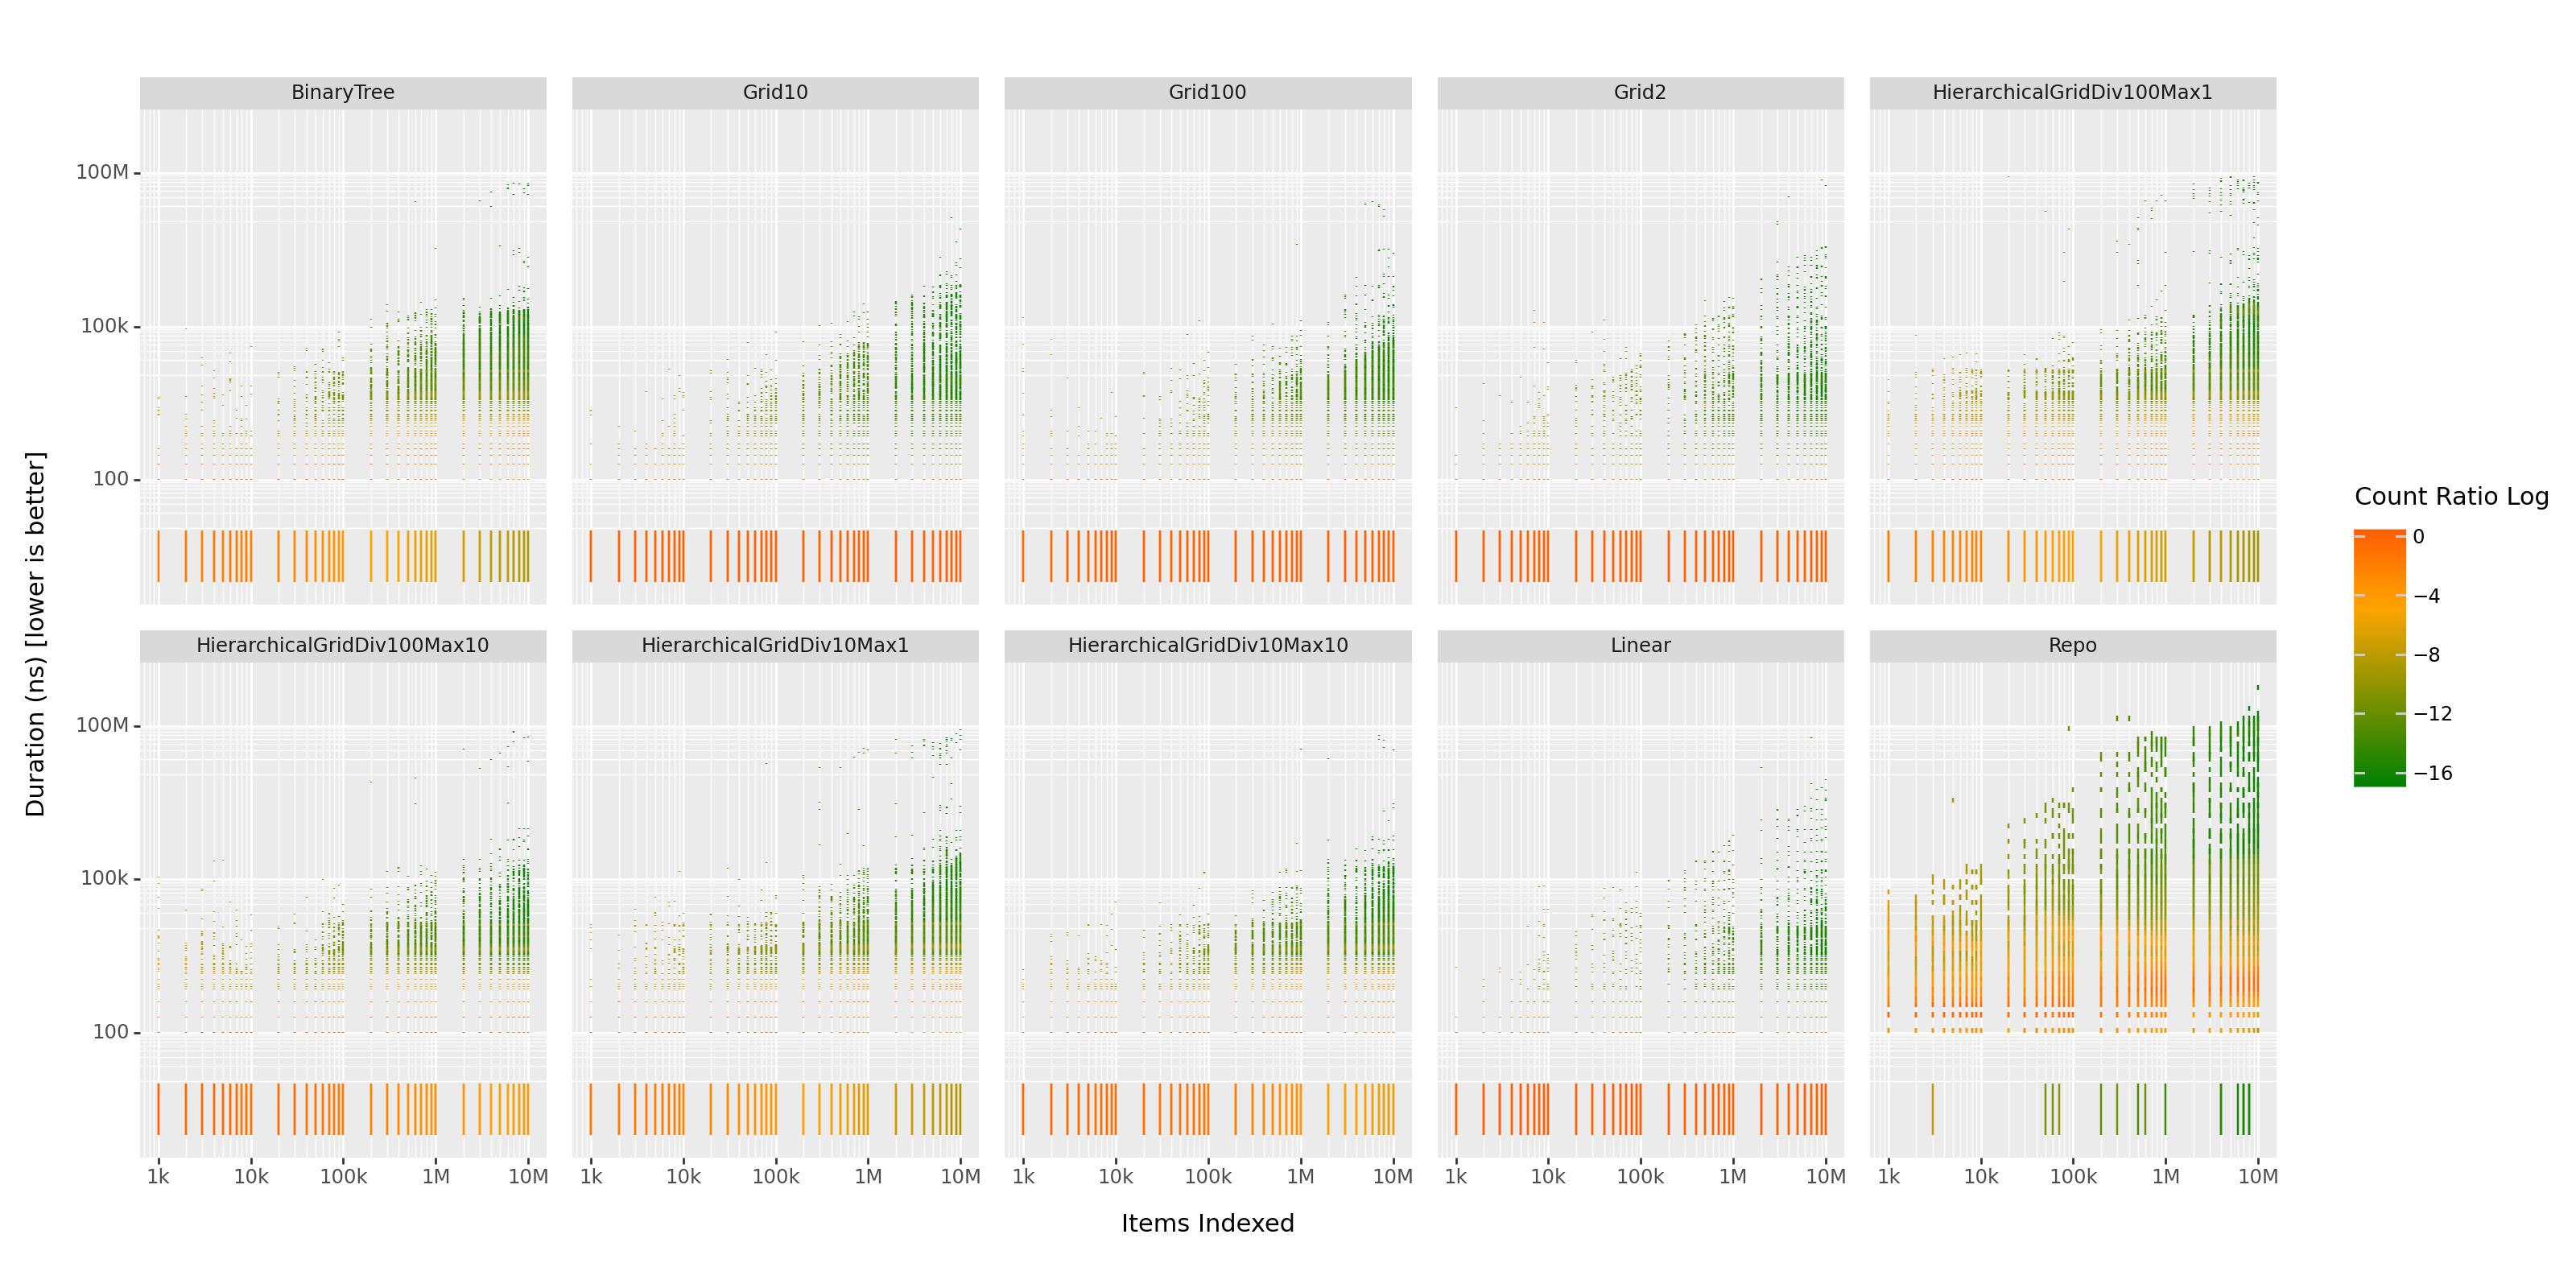

<Figure Size: (1600 x 800)>

In [18]:
from plotnine import ggplot, aes, geom_point, geom_tile, geom_text, geom_raster, geom_rect, scale_x_continuous, scale_fill_gradient, \
    scale_color_gradient, scale_color_gradient2, scale_fill_gradient2, theme, scale_x_log10, scale_y_log10, facet_wrap, labs
from formatters.number_suffix_format import number_suffix_format

# https://ggplot2.tidyverse.org/reference/geom_tile.html
# geom_rect() and geom_tile() do the same thing, but are parameterised differently: geom_rect() uses the locations of the four corners (xmin, xmax, ymin and ymax), while geom_tile() uses the center of the tile and its size (x, y, width, height). geom_raster() is a high performance special case for when all the tiles are the same size. 

(ggplot(plot_data, aes("Item Count", "Duration"))
 + geom_rect(aes(xmin='Item Count', xmax='Item Count', ymin='Start Duration',ymax='End Duration', color='Count Ratio Log', fill='Count Ratio Log'))
 #+ geom_text(aes(label='Count'), size=9)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 # + scale_x_continuous(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_y_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 # + scale_y_continuous(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 # + scale_color_gradient(low='green', high='red')
 + scale_color_gradient2(low='green', mid='orange', high='red',midpoint=-5.0, limits=[-16.5, 0.0])
 + scale_fill_gradient2(low='green', mid='orange', high='red',midpoint=-5.0, limits=[-16.5, 0.0])
 + facet_wrap("Algorithm", ncol=5, dir='h')
 + labs(x='Items Indexed', y='Duration (ns) [lower is better]')
 # + facet_wrap("Algorithm", scales="free")
 + theme(figure_size=(16, 8))  # here you define the plot size
 )

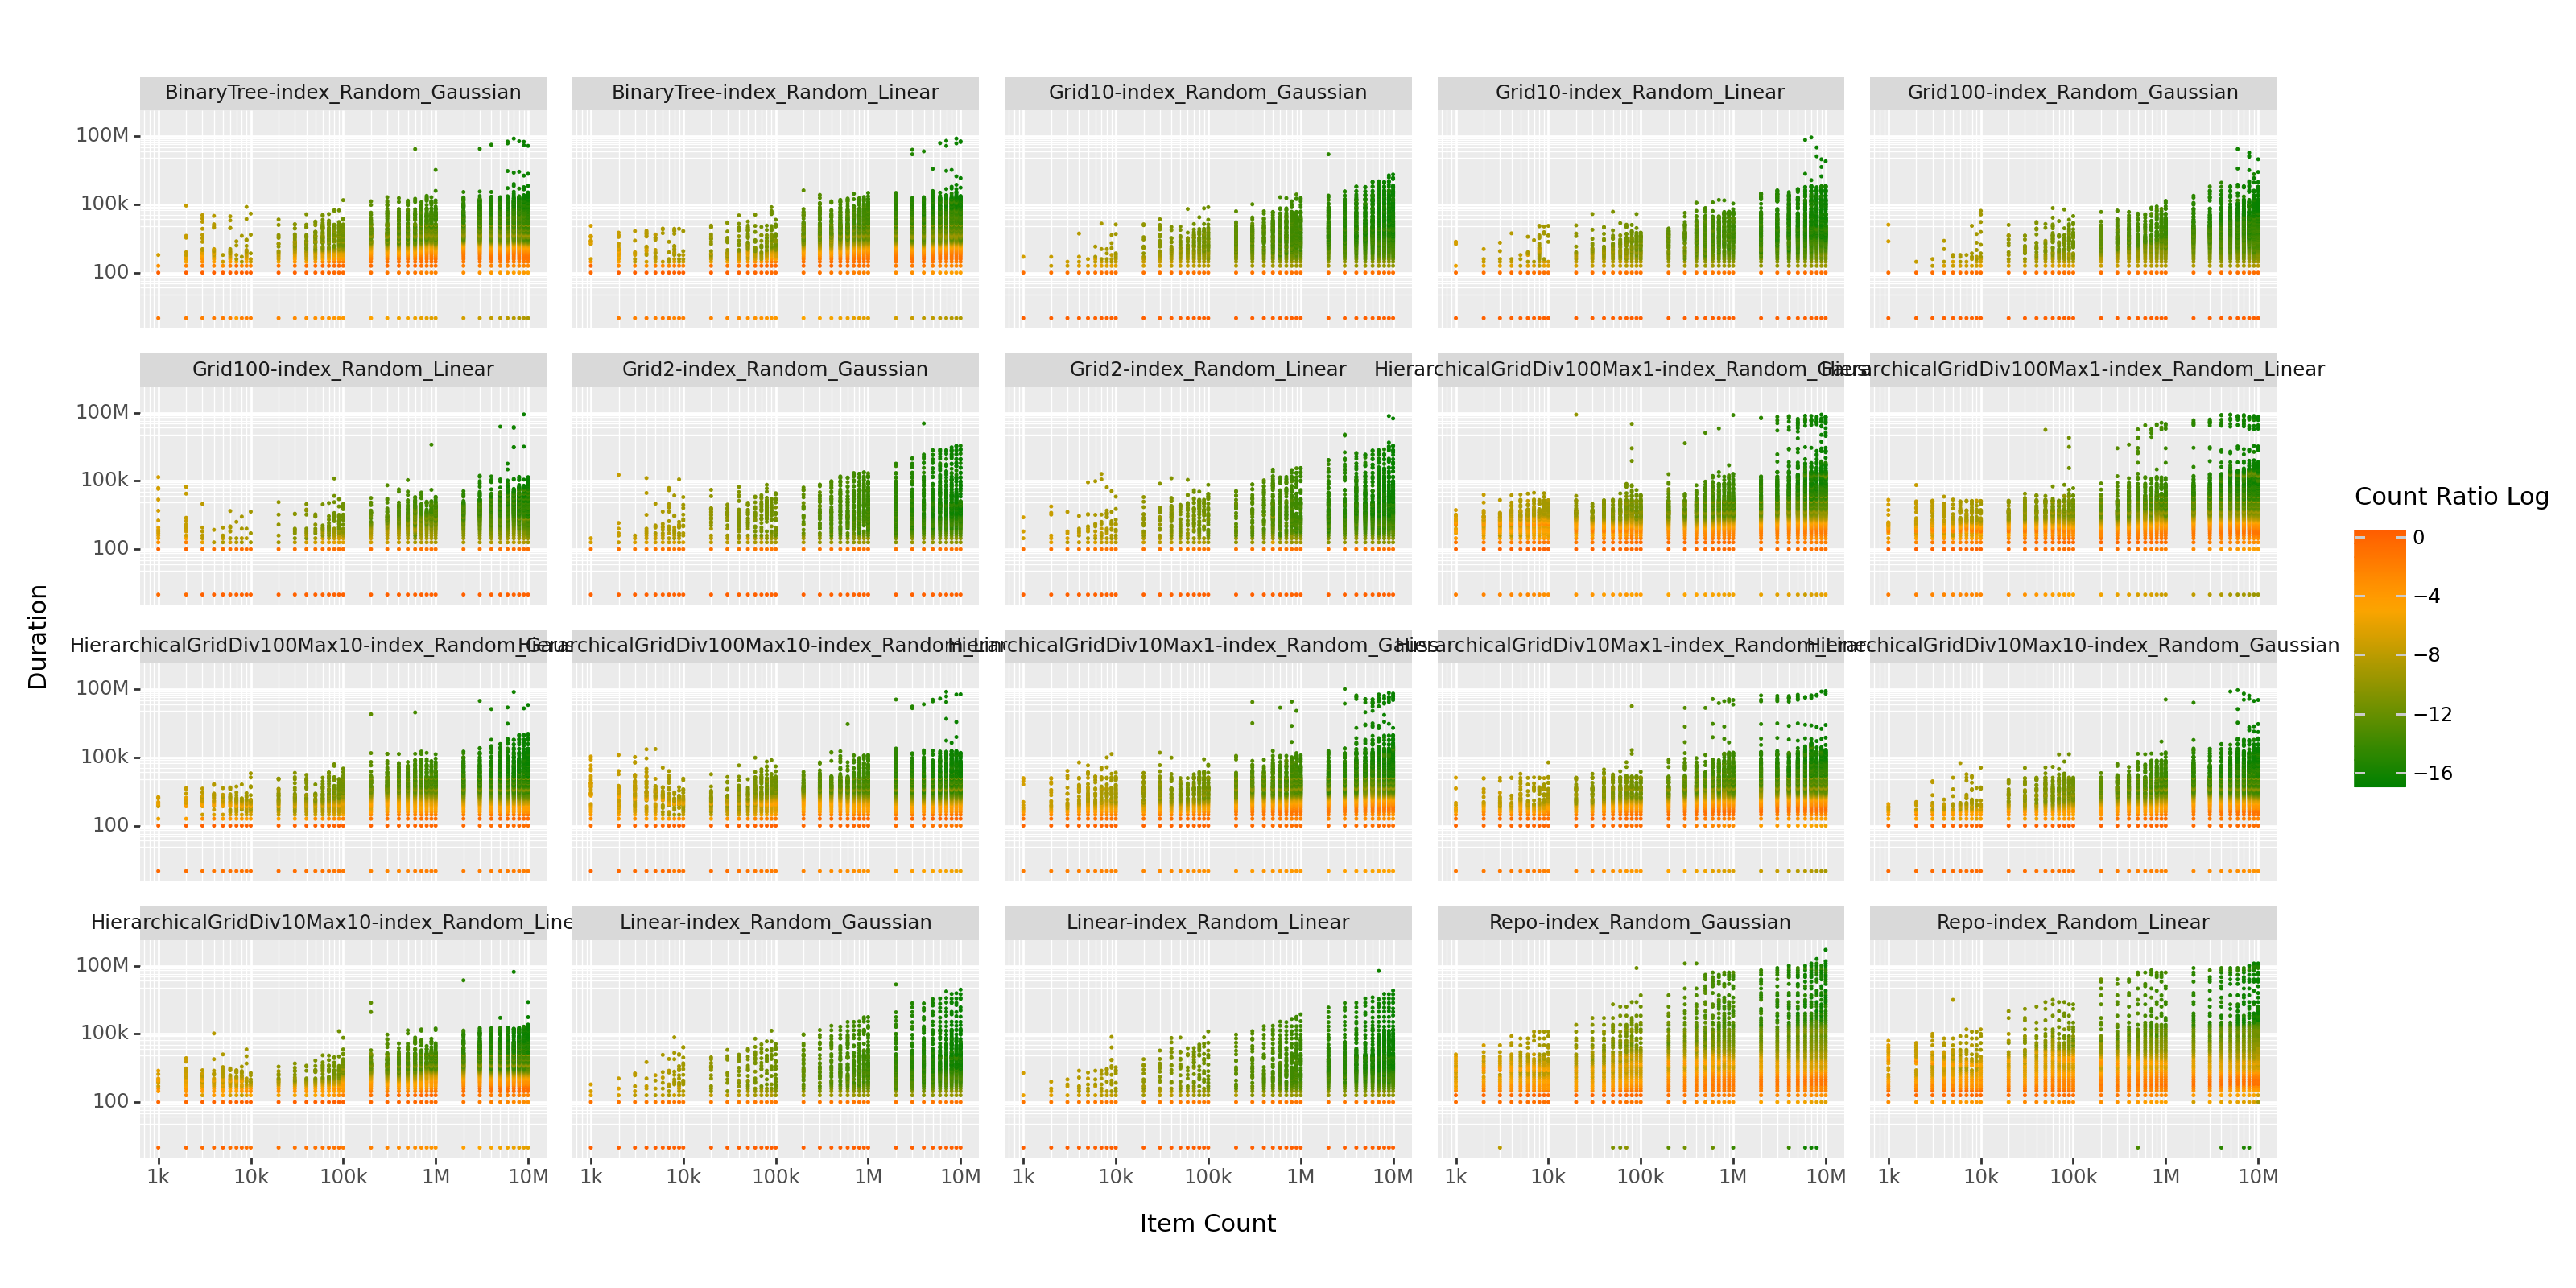

<Figure Size: (1600 x 800)>

In [19]:
from plotnine import ggplot, aes, geom_point, geom_tile, geom_text, geom_raster, geom_rect, scale_x_continuous, scale_fill_gradient, \
    scale_color_gradient, scale_color_gradient2, scale_fill_gradient2, theme, scale_x_log10, scale_y_log10, facet_wrap, labs
from formatters.number_suffix_format import number_suffix_format

plot = (ggplot(plot_data, aes('Item Count', 'Duration', color='Count Ratio Log', fill='Count Ratio Log'))
 + geom_point(size=0.01, alpha=1.0)
 #+ geom_tile(aes(width=.95, height=.95))
 #+ geom_text(aes(label='Count'), size=9)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_y_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 # + scale_x_continuous(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 # + scale_y_continuous(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 # + scale_color_gradient(low='red', high='green')
 # + scale_fill_gradient(low='red', high='green')
 + scale_color_gradient2(low='green', mid='orange', high='red',midpoint=-5.0, limits=[-16.5, 0.0])
 + scale_fill_gradient2(low='green', mid='orange', high='red',midpoint=-5.0, limits=[-16.5, 0.0])
 + facet_wrap("Algorithm-Test")
 + theme(figure_size=(16, 8))  # here you define the plot size
 )

# # Save the plot:
# plot.save(width=16, height=8, filename='performance-histogram-search-analysis.pdf')
# plot.save(width=16, height=8, filename='performance-histogram-search-analysis.png')
# plot.save(width=16, height=8, filename='performance-histogram-search-analysis.svg')

# Show the plot:
plot

In [20]:
from pandas import DataFrame
import numpy as np
from numpy.random import uniform
from numpy import repeat
from plotnine import ggplot, aes, geom_tile, geom_point, geom_text, geom_raster, geom_rect, scale_x_log10, \
    scale_y_log10, scale_x_continuous, scale_y_continuous, scale_fill_gradient, \
    scale_color_gradient, scale_color_gradient2, theme, geom_violin, geom_sina, scale_fill_gradient2, labs, ggtitle
from formatters.number_suffix_format import number_suffix_format


def plot_density_chart(plot_data: DataFrame, algorithm: str, title: str, item_count_filter: int = None) -> ggplot:
    """

    :param plot_data: The data to plot. 
    :param algorithm: The specific algorithm to filter for. eg: Repo, Linear, Grid10
    :param title: The title of the chart. eg: Repo Index
    :param item_count_filter: None to not use a filter, otherwise a filter for the item counts. eg: 3_000, or 10_000
    """
    plot_data_to_draw = plot_data.copy()
    plot_data_to_draw = plot_data_to_draw[plot_data_to_draw['Algorithm'] == algorithm]
    plot_data_to_draw = plot_data_to_draw[plot_data_to_draw['Test'] == 'index_Random_Linear']
    if item_count_filter != None:
        plot_data_to_draw = plot_data_to_draw[plot_data_to_draw['Item Count'] <= item_count_filter]
    # plot_data_to_draw = plot_data_to_draw[plot_data_to_draw['Item Count'] <= 3000]
    # plot_data_to_draw = plot_data_to_draw[plot_data_to_draw['Item Count'] <= 10000]
    # plot_data_to_draw = plot_data_to_draw[plot_data_to_draw['Item Count'] == 1000]
    # plot_data_to_draw = plot_data_to_draw[plot_data_to_draw['Item Count'] == 10000000]
    
    # Format the item count labels:
    item_count_formatter = number_suffix_format(fmt="{:.0f}", suffix="")
    plot_data_to_draw['Item Count Labels'] = item_count_formatter(plot_data_to_draw['Item Count'])
    
    unique_item_counts = plot_data_to_draw['Item Count Labels'].unique()
    
    plot_data_to_draw['Item Count Categorical'] = pd.Categorical(plot_data_to_draw['Item Count Labels'], categories = unique_item_counts)
    
    # Expand the data points:
    # plot_data_to_draw["Sample"] = repeat(plot_data_to_draw['Duration'], plot_data_to_draw['Count']).reset_index(drop=True)
    # plot_data_to_draw["Sample"] = plot_data_to_draw.apply(lambda row: repeat(row['Duration'], row['Count']), axis=1)
    plot_data_to_draw["Sample"] = plot_data_to_draw.apply(lambda row: uniform(row['Start Duration'], row['End Duration'], row['Count']), axis=1)
    # Explode the column:
    # https://stackoverflow.com/questions/39011511/pandas-expand-rows-from-list-data-available-in-column
    plot_data_to_draw = plot_data_to_draw.explode('Sample', ignore_index=True)
    
    # Set the data type for the sample column:
    # https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
    plot_data_to_draw['Sample'] = pd.to_numeric(plot_data_to_draw['Sample'])
    
    # Reset the index:
    # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
    #plot_data_to_draw.reset_index(inplace=True)
    
    plot = (
            ggplot(plot_data_to_draw, aes('Item Count Categorical', 'Sample', fill='Count Ratio'))
            # ggplot(plot_data_to_draw, aes('Item Count Categorical', 'Sample', fill='Count'))
            #+ geom_point()
            # + geom_sina(alpha=0.02, size=0.9, stroke=0, show_legend=True, scale='count')
            + geom_sina(alpha=0.05, size=3.0, stroke=0, show_legend=True, scale='count')
            #+ geom_sina()
            + geom_violin(draw_quantiles=[0.25, 0.50, 0.75, 0.95], fill=None, color='#000000A0', width=1.0)
            #+ geom_tile(aes(width=.95, height=.95))
            #+ geom_text(aes(label='Count'), size=9)
            # + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
            # + scale_x_continuous(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
            # + scale_y_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
            # + scale_y_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""), limits=[1, 10_000])
            + scale_y_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""), limits=[1, 100_000_000], breaks=[1, 10, 100, 1_000, 10_000, 100_000, 1_000_000, 10_000_000, 100_000_000])
            # + scale_y_continuous(labels = number_suffix_format(fmt="{:.0f}", suffix=""), limits=[0, 2_000])
            # + scale_color_gradient(low='red', high='green')
            # + scale_fill_gradient(low='red', high='green')
            # + scale_color_gradient2(low='red', mid='orange', high='green', midpoint=5_000_000)
            # + scale_fill_gradient2(low='red', mid='orange', high='green',midpoint=2_500)
            + scale_fill_gradient2(low='green', mid='orange', high='red',midpoint=0.25, limits=[0.0, 1.0])
            #+ facet_wrap("Algorithm-Test")
            + labs(x='Items Indexed', y='Duration (ns) [lower is better]')
            + ggtitle(title)
            + theme(figure_size=(16, 8))  # here you define the plot size
    )
    return plot


In [21]:
plot = plot_density_chart(plot_data, 'Repo', 'Repo Index')

# # Save the plot:
# plot.save(width=16, height=8, filename='performance-histogram-search-analysis-repo.pdf')
plot.save(width=16, height=8, filename='performance-histogram-add-analysis-repo.png')

# Draw the plot:
plot

MemoryError: Unable to allocate 4.47 GiB for an array with shape (10, 59995000) and data type float64

In [ ]:
plot = plot_density_chart(plot_data, 'Linear', 'Linear Index')

# # Save the plot:
# plot.save(width=16, height=8, filename='performance-histogram-search-analysis-linear.pdf')
plot.save(width=16, height=8, filename='performance-histogram-add-analysis-linear.png')

# Draw the plot:
plot

In [ ]:
plot = plot_density_chart(plot_data, 'Grid2', 'Grid with 2 Divisions')

# # Save the plot:
# plot.save(width=16, height=8, filename='performance-histogram-search-analysis-grid2.pdf')
plot.save(width=16, height=8, filename='performance-histogram-add-analysis-grid2.png')

# Draw the plot:
plot

In [ ]:
plot = plot_density_chart(plot_data, 'Grid10', 'Grid with 10 Divisions')

# # Save the plot:
# plot.save(width=16, height=8, filename='performance-histogram-search-analysis-grid10.pdf')
plot.save(width=16, height=8, filename='performance-histogram-add-analysis-grid10.png')

# Draw the plot:
plot

In [ ]:
plot = plot_density_chart(plot_data, 'Grid100', 'Grid with 100 Divisions')

# # Save the plot:
# plot.save(width=16, height=8, filename='performance-histogram-search-analysis-grid100.pdf')
plot.save(width=16, height=8, filename='performance-histogram-add-analysis-grid100.png')

# Draw the plot:
plot

In [ ]:
plot = plot_density_chart(plot_data, 'HierarchicalGridDiv10Max1', 'Hierarchical Grid with 10 Divisions and a Max of 1')

# # Save the plot:
# plot.save(width=16, height=8, filename='performance-histogram-search-analysis-hgrid10max1.pdf')
plot.save(width=16, height=8, filename='performance-histogram-add-analysis-hgrid10max1.png')

# Draw the plot:
plot

In [ ]:
plot = plot_density_chart(plot_data, 'HierarchicalGridDiv10Max10', 'Hierarchical Grid with 10 Divisions and a Max of 10')

# # Save the plot:
# plot.save(width=16, height=8, filename='performance-histogram-search-analysis-hgrid10max10.pdf')
plot.save(width=16, height=8, filename='performance-histogram-add-analysis-hgrid10max10.png')

# Draw the plot:
plot

In [ ]:
plot = plot_density_chart(plot_data, 'HierarchicalGridDiv100Max1', 'Hierarchical Grid with 100 Divisions and a Max of 1')

# # Save the plot:
# plot.save(width=16, height=8, filename='performance-histogram-search-analysis-hgrid100max1.pdf')
plot.save(width=16, height=8, filename='performance-histogram-add-analysis-hgrid100max1.png')

# Draw the plot:
plot

In [ ]:
plot = plot_density_chart(plot_data, 'HierarchicalGridDiv100Max10', 'Hierarchical Grid with 100 Divisions and a Max of 10')

# # Save the plot:
# plot.save(width=16, height=8, filename='performance-histogram-search-analysis-hgrid100max10.pdf')
plot.save(width=16, height=8, filename='performance-histogram-add-analysis-hgrid100max10.png')

# Draw the plot:
plot

In [ ]:
plot = plot_density_chart(plot_data, 'BinaryTree', 'Binary Tree')

# # Save the plot:
# plot.save(width=16, height=8, filename='performance-histogram-search-analysis-binary-tree.pdf')
plot.save(width=16, height=8, filename='performance-histogram-add-analysis-binary-tree.png')

# Draw the plot:
plot

In [5]:
from pandas import DataFrame
import numpy as np
from numpy.random import uniform
from numpy import repeat
from plotnine import ggplot, aes, geom_tile, geom_point, geom_text, geom_raster, geom_rect, scale_x_log10, \
    scale_y_log10, scale_x_continuous, scale_y_continuous, scale_fill_gradient, \
    scale_color_gradient, scale_color_gradient2, theme, geom_violin, geom_sina, scale_fill_gradient2, labs, ggtitle, facet_wrap
from formatters.number_suffix_format import number_suffix_format


def plot_density_chart_all(plot_data: DataFrame, title: str, algorithm_sort: list[str] = None, item_test_filter: str = None, item_count_filter: int = None) -> ggplot:
    """

    :param plot_data: The data to plot. 
    :param title: The title of the chart. eg: Repo Index
    :param algorithm_sort: The array to sort the algorithms by. eg: ['Linear', 'Repo']
    :param item_test_filter: None to show all the data, otherwise the name of the test data to show. eg: index_Random_Linear or index_Random_Gaussian
    :param item_count_filter: None to not use a filter, otherwise a filter for the item counts. eg: 3_000, or 10_000
    """
    plot_data_to_draw = plot_data.copy()
    # plot_data_to_draw = plot_data_to_draw[plot_data_to_draw['Algorithm'] == 'Repo']
    if item_test_filter is not None:
        plot_data_to_draw = plot_data_to_draw[plot_data_to_draw['Test'] == item_test_filter]
    if item_count_filter is not None:
        plot_data_to_draw = plot_data_to_draw[plot_data_to_draw['Item Count'] <= item_count_filter]
    # plot_data_to_draw = plot_data_to_draw[plot_data_to_draw['Item Count'] <= 3000]
    # plot_data_to_draw = plot_data_to_draw[plot_data_to_draw['Item Count'] <= 10000]
    # plot_data_to_draw = plot_data_to_draw[plot_data_to_draw['Item Count'] == 1000]
    # plot_data_to_draw = plot_data_to_draw[plot_data_to_draw['Item Count'] == 10000000]

    # Sort the algorithms for display:
    # https://stackoverflow.com/a/42765026/231860
    if algorithm_sort is not None:
        # Sort in the order provided:
        plot_data_to_draw['Algorithm'] = pd.Categorical(plot_data_to_draw['Algorithm'],ordered=True, categories=algorithm_sort)

    plot = (
            ggplot(plot_data_to_draw, aes('Item Count', 'Duration', color='Count Ratio Log', fill='Count Ratio Log'))
            + geom_point(size=2.0, alpha=0.5)
            #+ geom_tile(aes(width=.95, height=.95))
            #+ geom_text(aes(label='Count'), size=9)
            # + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
            # + scale_x_continuous(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
            + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""), limits=[1_000, 10_000_000], breaks=[1, 10, 100, 1_000, 10_000, 100_000, 1_000_000, 10_000_000])
            # + scale_y_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
            # + scale_y_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""), limits=[1, 10_000])
            + scale_y_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""), limits=[1, 100_000_000], breaks=[1, 10, 100, 1_000, 10_000, 100_000, 1_000_000, 10_000_000, 100_000_000])
            # + scale_y_continuous(labels = number_suffix_format(fmt="{:.0f}", suffix=""), limits=[0, 2_000])
            # + scale_color_gradient(low='red', high='green')
            # + scale_fill_gradient(low='red', high='green')
            # + scale_color_gradient2(low='red', mid='orange', high='green', midpoint=5_000_000)
            # + scale_fill_gradient2(low='red', mid='orange', high='green',midpoint=2_500)
            + scale_color_gradient2(low='green', mid='orange', high='red',midpoint=-5.0, limits=[-16.5, 0.0])
            + scale_fill_gradient2(low='green', mid='orange', high='red',midpoint=-5.0, limits=[-16.5, 0.0])
            + facet_wrap("Algorithm", ncol=5, dir='h')
            + labs(x='Items Indexed', y='Duration (ns) [lower is better]')
            + ggtitle(title)
            + theme(figure_size=(16, 8))  # here you define the plot size
    )
    return plot


C:\Mach\Source\nanovc-java-kdrepo\venv\lib\site-packages\plotnine\ggplot.py:587: PlotnineWarning: Saving 16 x 8 in image.
C:\Mach\Source\nanovc-java-kdrepo\venv\lib\site-packages\plotnine\ggplot.py:588: PlotnineWarning: Filename: performance-histogram-add-analysis-all-linear-data.png
C:\Mach\Source\nanovc-java-kdrepo\venv\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 56 rows containing missing values.
C:\Mach\Source\nanovc-java-kdrepo\venv\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 56 rows containing missing values.


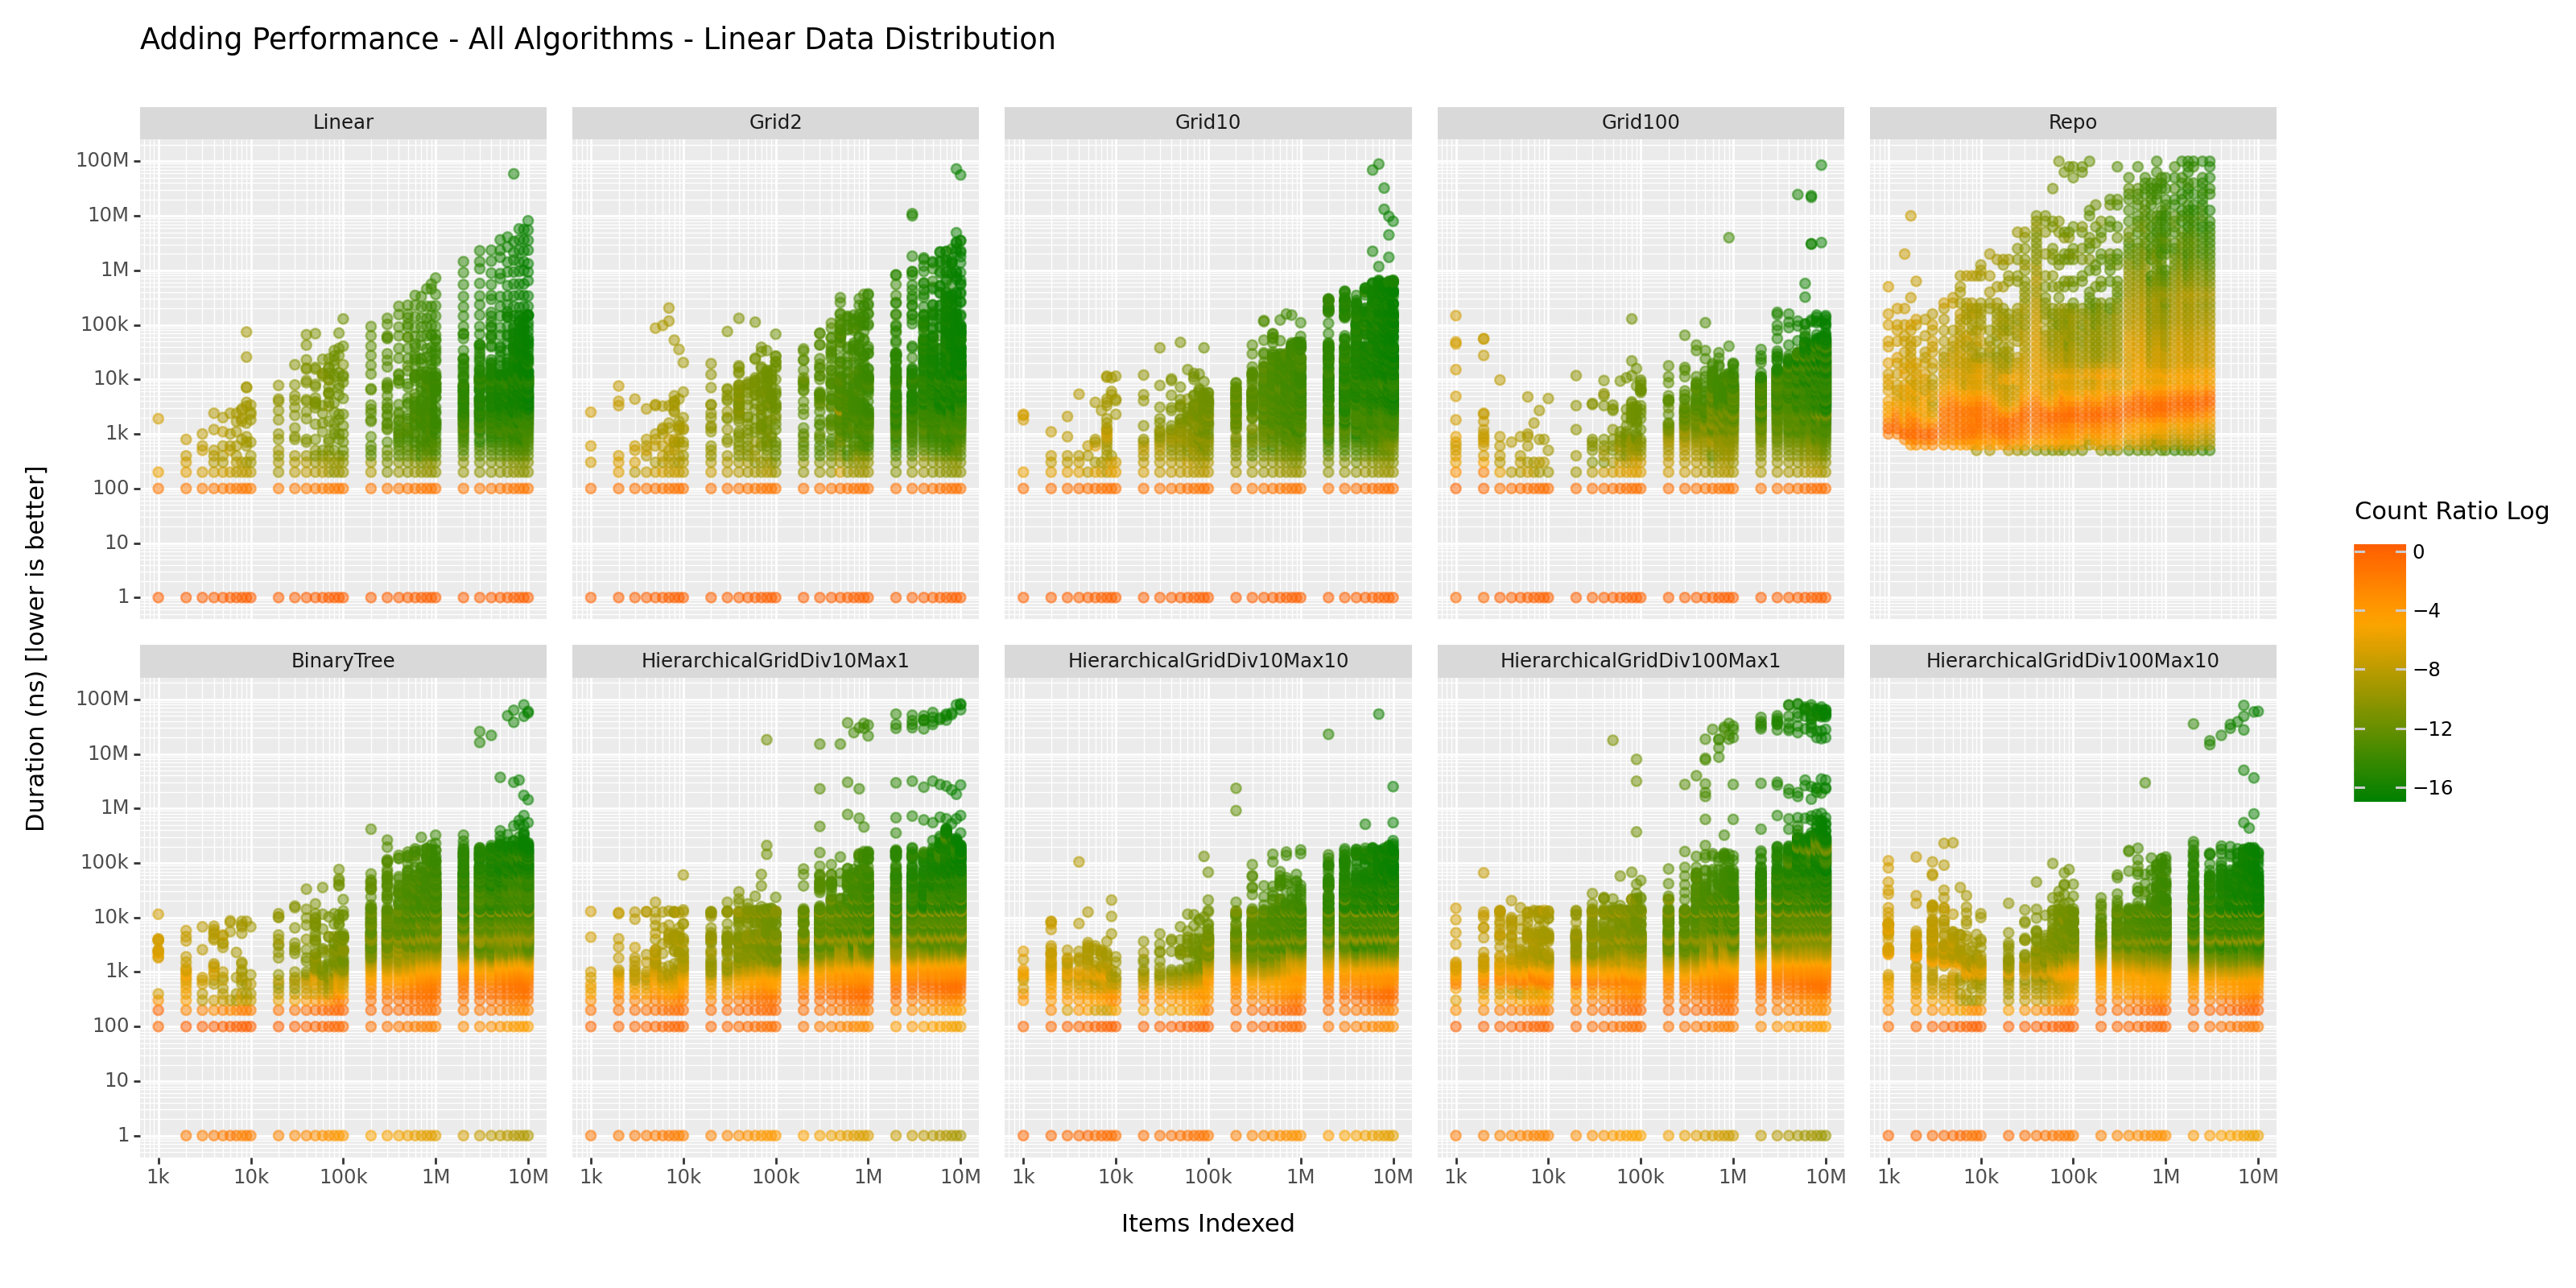

<Figure Size: (1600 x 800)>

In [6]:
plot = plot_density_chart_all(
    plot_data, 'Adding Performance - All Algorithms - Linear Data Distribution',
    algorithm_sort=[
        'Linear', 'Grid2', 'Grid10','Grid100', 'Repo',
        'BinaryTree', 'HierarchicalGridDiv10Max1','HierarchicalGridDiv10Max10', 'HierarchicalGridDiv100Max1', 'HierarchicalGridDiv100Max10',
    ],
    item_count_filter=None,
    item_test_filter='index_Random_Linear'
)

# # Save the plot:
# plot.save(width=16, height=8, filename='performance-histogram-search-analysis-all.pdf')
plot.save(width=16, height=8, filename='performance-histogram-add-analysis-all-linear-data.png')

# Draw the plot:
plot

C:\Mach\Source\nanovc-java-kdrepo\venv\lib\site-packages\plotnine\ggplot.py:587: PlotnineWarning: Saving 16 x 8 in image.
C:\Mach\Source\nanovc-java-kdrepo\venv\lib\site-packages\plotnine\ggplot.py:588: PlotnineWarning: Filename: performance-histogram-add-analysis-all-gaussian-data.png
C:\Mach\Source\nanovc-java-kdrepo\venv\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 63 rows containing missing values.
C:\Mach\Source\nanovc-java-kdrepo\venv\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 63 rows containing missing values.


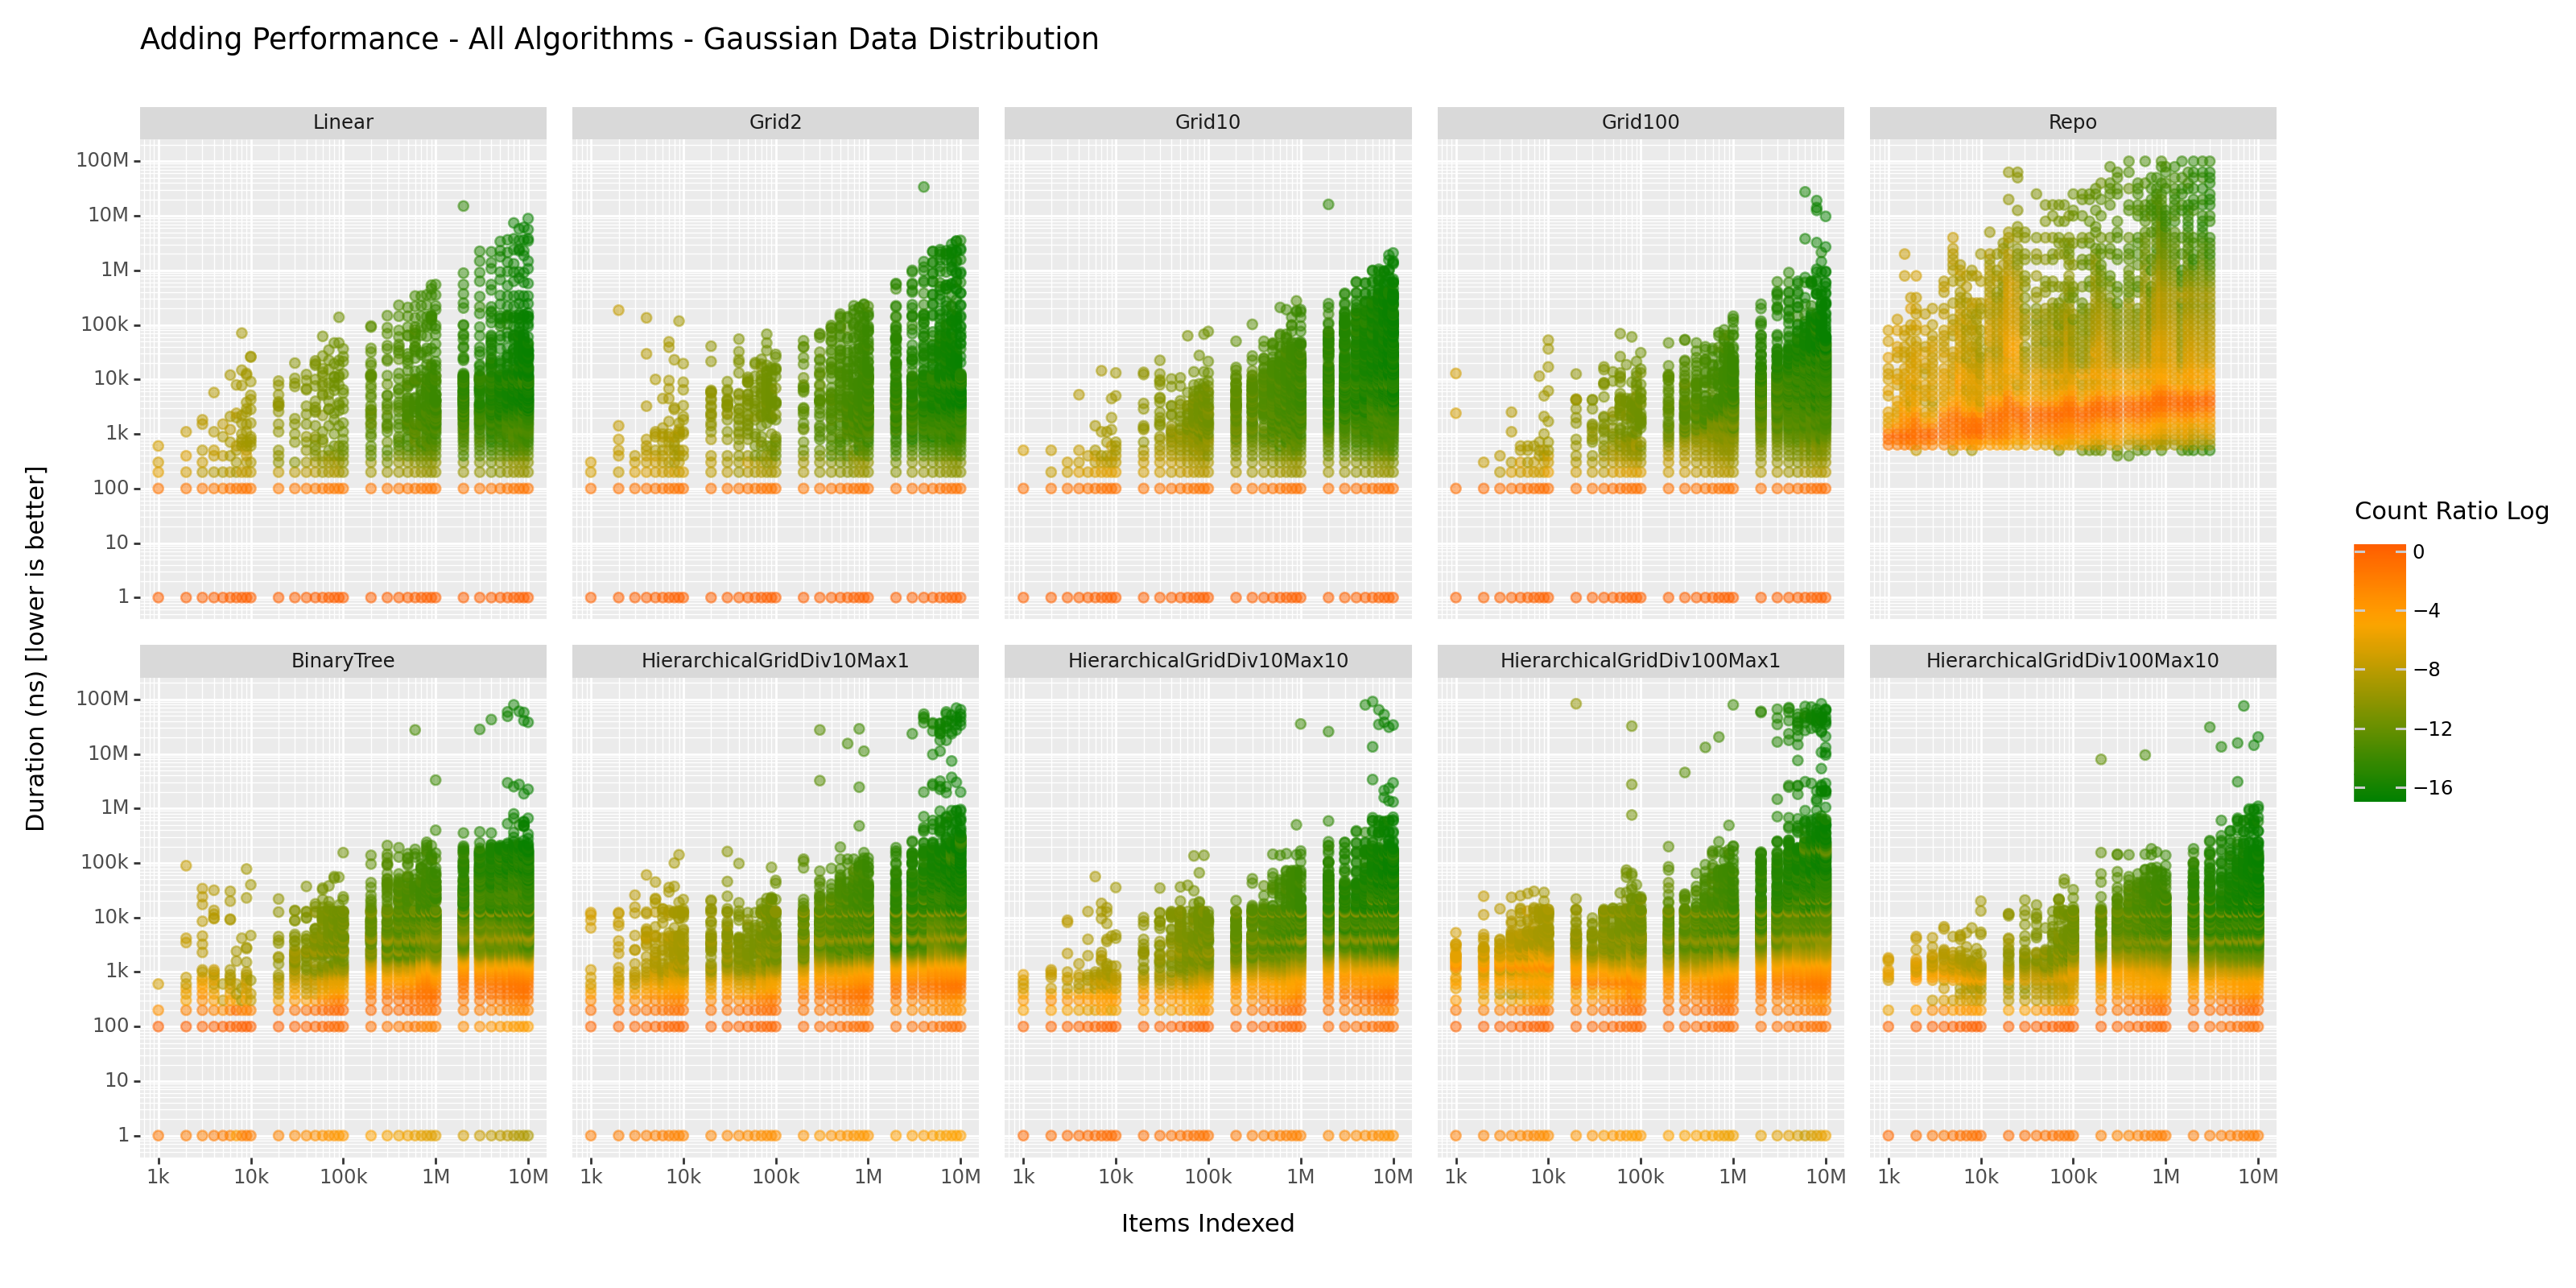

<Figure Size: (1600 x 800)>

In [7]:
plot = plot_density_chart_all(
    plot_data, 'Adding Performance - All Algorithms - Gaussian Data Distribution',
    algorithm_sort=[
        'Linear', 'Grid2', 'Grid10','Grid100', 'Repo',
        'BinaryTree', 'HierarchicalGridDiv10Max1','HierarchicalGridDiv10Max10', 'HierarchicalGridDiv100Max1', 'HierarchicalGridDiv100Max10',
    ],
    item_count_filter=None,
    item_test_filter='index_Random_Gaussian'
)

# # Save the plot:
# plot.save(width=16, height=8, filename='performance-histogram-search-analysis-all.pdf')
plot.save(width=16, height=8, filename='performance-histogram-add-analysis-all-gaussian-data.png')

# Draw the plot:
plot